In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
lats = np.random.uniform(low = -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [21]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [24]:
lats = np.random.uniform(low = -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [26]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

631

In [27]:
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [28]:
'''
for i in range(len(cities)):
    #Group cities in sets of 50 for loggin purposes
    if(i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    city_url = url + "&q=" + cities[i]
'''

'\nfor i in range(len(cities)):\n    #Group cities in sets of 50 for loggin purposes\n    if(i % 50 == 0 and i >=50):\n        set_count += 1\n        record_count = 1\n        time.sleep(60)\n    \n    city_url = url + "&q=" + cities[i]\n'

In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | great falls
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | sept-iles
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | bordighera
Processing Record 11 of Set 1 | samarai
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | ponta delgada
Processing Record 14 of Set 1 | paita
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | uige
Processing Record 19 of Set 1 | charters towers
Processing Record 20 of Set 1 | litoral del san juan
City not found. Skipping...
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | labutta
City not found. Skipping...
Processing Record 23 of S

Processing Record 41 of Set 4 | mendi
Processing Record 42 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 43 of Set 4 | tiznit
Processing Record 44 of Set 4 | jinchang
Processing Record 45 of Set 4 | toftir
City not found. Skipping...
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | harper
Processing Record 48 of Set 4 | akcakoca
Processing Record 49 of Set 4 | labrea
Processing Record 50 of Set 4 | ada
Processing Record 1 of Set 5 | solovetskiy
City not found. Skipping...
Processing Record 2 of Set 5 | novoselitskoye
Processing Record 3 of Set 5 | vasteras
Processing Record 4 of Set 5 | lumeje
Processing Record 5 of Set 5 | mednogorsk
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | puerto leguizamo
Processing Record 8 of Set 5 | cascas
Processing Record 9 of Set 5 | rockport
Processing Record 10 of Set 5 | tambacounda
Processing Record 11 of Set 5 | yangambi
Processing Record 12 of Set 5 | quesnel
Processing Record 13 of 

Processing Record 31 of Set 8 | persianovskiy
Processing Record 32 of Set 8 | chapais
Processing Record 33 of Set 8 | tome-acu
City not found. Skipping...
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | vanavara
Processing Record 36 of Set 8 | iralaya
Processing Record 37 of Set 8 | chenzhou
Processing Record 38 of Set 8 | ocean city
Processing Record 39 of Set 8 | bereda
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | anshun
Processing Record 42 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 43 of Set 8 | maragogi
Processing Record 44 of Set 8 | stekolnyy
City not found. Skipping...
Processing Record 45 of Set 8 | aosta
Processing Record 46 of Set 8 | oranjemund
Processing Record 47 of Set 8 | nishihara
Processing Record 48 of Set 8 | buluang
Processing Record 49 of Set 8 | falkenberg
Processing Record 50 of Set 8 | westpunt
City not found. Skipping...
Processing Record 1 of Set 9 | talaya
Processing Record 2 o

Processing Record 16 of Set 12 | sayyan
Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | lokoja
Processing Record 19 of Set 12 | valparaiso
Processing Record 20 of Set 12 | namtsy
Processing Record 21 of Set 12 | constantine
Processing Record 22 of Set 12 | pushkar
Processing Record 23 of Set 12 | stromness
Processing Record 24 of Set 12 | ongandjera
Processing Record 25 of Set 12 | alizai
Processing Record 26 of Set 12 | dodola
Processing Record 27 of Set 12 | pampa
Processing Record 28 of Set 12 | ayan
Processing Record 29 of Set 12 | batouri
Processing Record 30 of Set 12 | yumen
Processing Record 31 of Set 12 | tucuma
Processing Record 32 of Set 12 | gizo
Processing Record 33 of Set 12 | marion
Processing Record 34 of Set 12 | great yarmouth
Processing Record 35 of Set 12 | gwadar
Processing Record 36 of Set 12 | kuybysheve
Processing Record 37 of Set 12 | beitbridge
Processing Record 38 of Set 12 | andenes
Processing Record 39 of Set 12 | ortakoy
Proces

In [30]:
len(city_data)

580

In [32]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [33]:
city_data_df = city_data_df[new_col_order]

In [34]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Great Falls,US,2022-08-29 16:43:44,47.5002,-111.3008,72.41,35,0,11.50
1,Codrington,AU,2022-08-29 16:43:45,-38.2667,141.9667,47.75,98,100,10.58
2,Sept-Iles,CA,2022-08-29 16:43:45,50.2001,-66.3821,73.40,72,75,10.36
3,Bluff,NZ,2022-08-29 16:43:45,-46.6000,168.3333,44.80,85,56,4.76
4,Port Alfred,ZA,2022-08-29 16:43:46,-33.5906,26.8910,53.19,86,100,4.00


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
today = time.time()
today

1661793654.4574301

In [38]:
today = time.strftime("%x")
today

'08/29/22'

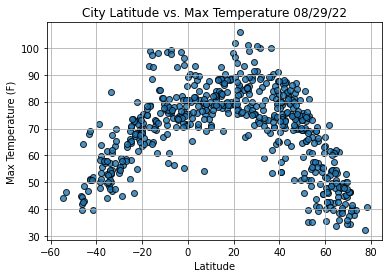

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()